# <font color=blue>Assignments for "Performance Measurement Metrics"</font>

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None

In [4]:
titanic = pd.read_csv("C:/Users/Elif/data/titanic.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
titanic["is_male"] = pd.get_dummies(titanic.Sex, drop_first=True)
titanic.groupby(["Embarked"])["PassengerId"].count()

Embarked
C    130
Q     28
S    554
Name: PassengerId, dtype: int64

In [16]:
titanic.dropna(subset=['Age', 'Embarked'],inplace=True)

In [18]:
X=titanic[['Pclass','is_male','Fare','SibSp','Parch']]
y=titanic[['Survived']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=111)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
train_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)


**Performance of Metrics**

In [29]:
confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix Train Data\n",confusion_matrix_train,"\n","****************************")
print("Confusion Matrix Test Data \n",confusion_matrix_test)

Confusion Matrix Train Data
 [[301  45]
 [ 74 149]] 
 ****************************
Confusion Matrix Test Data 
 [[69  9]
 [21 44]]


Additional information:
- First cell in data: Which is actually not survived and predicted to be not survived. 0-0

- Second cell in data: Which is actually not survived but predicted to be survived.0-1

- Third cell in data: Which is actually survived but predicted to be not survived.1-0

- Forth cell in data: Which is actually suvived and predicted to be survived. 1-1



In [30]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 69
True positive amount  : 44
False positive amount : 9
False negative amount : 21


In [20]:
from sklearn.metrics import accuracy_score
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

accuracy_score() value        :  0.7902097902097902


In [21]:
from sklearn.metrics import precision_score
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

precision_score() value      :  0.8301886792452831


In [22]:
from sklearn.metrics import recall_score
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

recall_score() value      :  0.676923076923077


In [23]:
from sklearn.metrics import f1_score
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

f1_score() value     :  0.7457627118644068


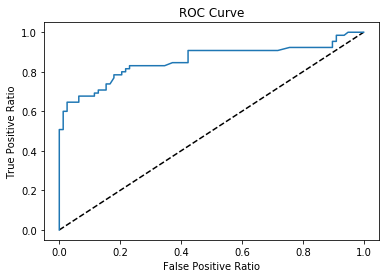

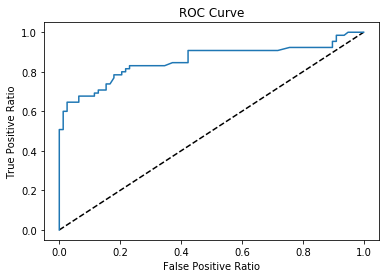

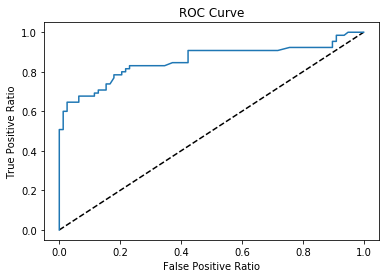

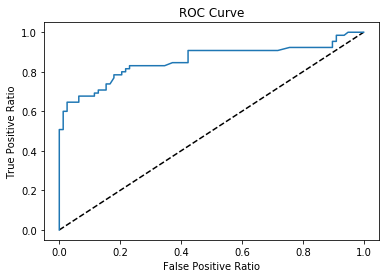

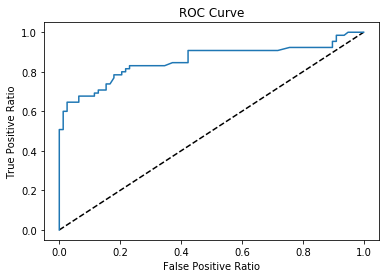

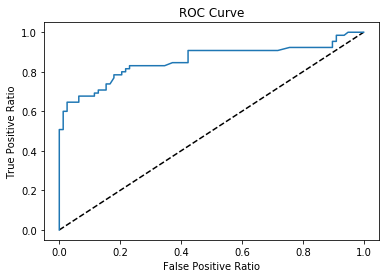

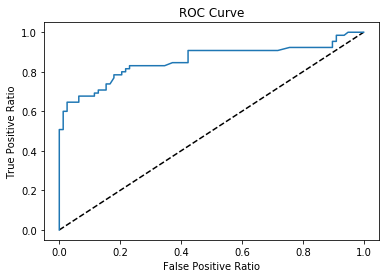

In [31]:

C_values = [0.001,0.01, 0.1,1,10,100, 1000]

import matplotlib.pyplot as plt
# Plot ROC curve
for c in C_values:
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train, y_train)
    test_prediction_proba_ = log_reg.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba_)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)

    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC Curve')

    plt.show()

In [27]:
accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.676626,0.608392
1,0.010,0.708260,0.664336
2,0.100,0.785589,0.804196
3,1.000,0.790861,0.790210
4,10.000,0.792619,0.790210
5,100.000,0.792619,0.790210
6,1000.000,0.792619,0.790210
